#  第3章 k近邻法

In [1]:
import math

## 计算$x_i,y_i$的$L_p$距离
$L_p(x_i,y_i)=\big( \sum_{l=1}^n|x_i^{(l)}-y_i^{(l)}| \big)^{\frac{1}{p}}$

In [2]:
def L(x, y, p=2):
    if len(x) == len(y) and len(x) > 1:
        sum = 0
        for i in range(len(x)):
            sum += math.pow(abs(x[i] - y[i]), p)
        return math.pow(sum, 1/p)
    else:
        return 0

## 《统计学习方法》P39，例3.1
已知二维空间的3个点$x_1=(1,1)^T,x_2=(5,1)^T,x_3=(4,4)^T$，试求在$p$取不同值时，$L_p$距离下$x_1$的最近邻点。

In [3]:
x1 = [1, 1]
x2 = [5, 1]
x3 = [4, 4]

求$x_1到其他点的L_1,L_2,L_3,L_4$的最近距离

In [4]:
for i in range(1, 5):
    r = { 'L{0}-{1}-{2}'.format(i ,key, value):L(x1, value, p=i) for key, value in {'x2':x2, 'x3':x3}.items()}
    print(min(zip(r.values(), r.keys())))

(4.0, 'L1-x2-[5, 1]')
(4.0, 'L2-x2-[5, 1]')
(3.7797631496846193, 'L3-x3-[4, 4]')
(3.5676213450081633, 'L4-x3-[4, 4]')


## 用KNN算法对iris进行分类预测

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from collections import Counter

In [6]:
# 加载iris数据
iris = load_iris()
# 转换为pd的dataFrame结构
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.head(5)

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


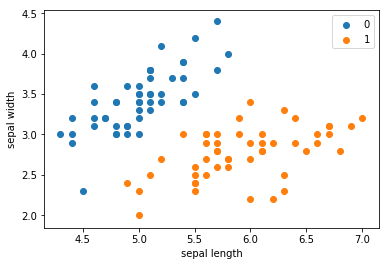

In [7]:
# 绘制前50个点，label=0
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
# 绘制50-100个点，label=1
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [8]:
# 获取前100个数据集，并获得sepal length，sepal width，label的数据
data = np.array(df.iloc[:100, [0, 1, -1]])
# 将特征与标签分来，特征集为X，y为标签集
X, y = data[:,:-1], data[:,-1]
# 分成80%的训练集和20%的测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
class KNN:
    def __init__(self, X_train, y_train, n_neighbors=3, p=2):
        """
        parameter: n_neighbors 临近点个数
        parameter: p 距离度量
        """
        self.n = n_neighbors
        self.p = p
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X):
        knn_list = []
        for i in range(self.n):
            # np.linalg.norm求范数
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            knn_list.append((dist, self.y_train[i]))
            
        for i in range(self.n, len(self.X_train)):
            max_index = knn_list.index(max(knn_list, key=lambda x: x[0]))
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            if knn_list[max_index][0] > dist:
                knn_list[max_index] = (dist, self.y_train[i])
                
        knn = [k[-1] for k in knn_list]
        count_pairs = Counter(knn)
        max_count = sorted(count_pairs, key=lambda x:x)[-1]
        return max_count
    
    # 得到正确判断分类的数据个数
    def score(self, X_test, y_test):
        right_count = 0
        n = 10
        for X, y in zip(X_test, y_test):
            label = self.predict(X)
            if label == y:
                right_count += 1
        return right_count / len(X_test)

In [10]:
clf = KNN(X_train, y_train)

In [11]:
clf.score(X_test, y_test)

1.0

In [12]:
# 输入测试点，并预测分类
test_point = [6.0, 3.0]
print('Test Point: {}'.format(clf.predict(test_point)))

Test Point: 1.0


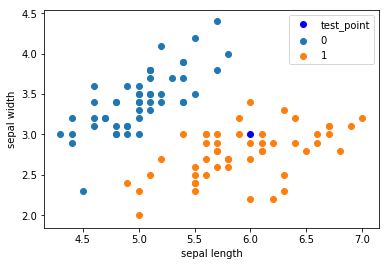

In [13]:
# 绘制前50个点，label=0
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
# 绘制50-100个点，label=1
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
# 绘制测试点
plt.plot(test_point[0], test_point[1], 'bo', label='test_point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

# 用scikitlearn算法包进行KNN算法调用

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# 创建KNeighborsClassifier对象
clf_sk = KNeighborsClassifier()
# 调用fit函数
clf_sk.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
# 调用predict函数进行预测
clf_sk.score(X_test, y_test)

1.0

In [17]:
clf_sk.predict([[6.0, 3.0]])

array([1.])